In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the data
df = pd.read_csv('wfp_food_prices_global_2025.csv')

### ***Data Cleaning*** 

In [52]:
df.head()

,country code,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690.0,37.04,70.46,cereals and tubers,Bread,55.0,KG,aggregate,Retail,AFN,77.00,1.05
2,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690.0,37.04,70.46,cereals and tubers,Rice (high quality),247.0,KG,aggregate,Retail,AFN,88.54,1.21
3,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690.0,37.04,70.46,cereals and tubers,Rice (low quality),145.0,KG,aggregate,Retail,AFN,55.00,0.75
4,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690.0,37.04,70.46,cereals and tubers,Wheat,84.0,KG,aggregate,Retail,AFN,23.19,0.32


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81892 entries, 0 to 81891
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country code  81891 non-null  object 
 1   date          81891 non-null  object 
 2   admin1        81891 non-null  object 
 3   admin2        81891 non-null  object 
 4   market        81891 non-null  object 
 5   market_id     81891 non-null  float64
 6   latitude      81891 non-null  float64
 7   longitude     81891 non-null  float64
 8   category      81891 non-null  object 
 9   commodity     81891 non-null  object 
 10  commodity_id  81891 non-null  float64
 11  unit          81891 non-null  object 
 12  priceflag     81891 non-null  object 
 13  pricetype     81891 non-null  object 
 14  currency      81891 non-null  object 
 15  price         81891 non-null  float64
 16  usdprice      81477 non-null  float64
dtypes: float64(6), object(11)
memory usage: 10.6+ MB


In [46]:
df.isnull().sum()

country code      1
date              1
admin1            1
admin2            1
market            1
market_id         1
latitude          1
longitude         1
category          1
commodity         1
commodity_id      1
unit              1
priceflag         1
pricetype         1
currency          1
price             1
usdprice        415
dtype: int64

In [45]:
df.duplicated().sum()

0

In [64]:
# Example of converting a column to datetime if 'date' column exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    print("\n'date' column converted to datetime.")


'date' column converted to datetime.


### ***Data Analysis***

In [65]:
df.describe()

,date,market_id,latitude,longitude,commodity_id,price,usdprice
count,81891,81891.000000,81891.000000,81891.000000,81891.000000,8.189100e+04,81477.000000
mean,2025-03-07 14:25:52.258489856,3493.927233,17.132029,46.861371,341.019978,2.054818e+04,11.548046
min,2025-01-15 00:00:00,80.000000,-26.030000,-79.900000,50.000000,1.500000e-01,0.000110
25%,2025-02-15 00:00:00,1626.000000,6.980000,28.470000,96.000000,6.130000e+01,0.660000
50%,2025-03-15 00:00:00,2676.000000,13.190000,36.730000,199.000000,4.240000e+02,1.240000
75%,2025-04-15 00:00:00,4320.000000,33.340000,78.400000,463.000000,4.376695e+03,2.810000
max,2025-06-15 00:00:00,10586.000000,51.500000,126.900000,1319.000000,7.400000e+06,6299.210000
std,NaN,2625.070087,16.673885,43.335413,320.924854,1.786371e+05,139.456563


In [54]:
# Example of analyzing trends over time (if 'date' and 'price' columns exist)
if 'date' in df.columns and 'price' in df.columns:
    # Group by date and calculate the mean price
    price_over_time = df.groupby('date')['price'].mean().reset_index()
    print("\nAverage price over time (first 5 rows):")
    print(price_over_time.head())


Average price over time (first 5 rows):
        date         price
0 2025-01-15  19321.948543
1 2025-02-15  19333.321916
2 2025-03-15  18527.896080
3 2025-04-15  24676.904495
4 2025-05-15  26859.423439


In [55]:
# Example of analyzing prices by commodity (if 'commodity' and 'price' columns exist)
if 'commodity' in df.columns and 'price' in df.columns:
    # Group by commodity and calculate the mean price
    price_by_commodity = df.groupby('commodity')['price'].mean().sort_values(ascending=False).reset_index()
    print("\nAverage price by commodity:")
    print(price_by_commodity.head())


Average price by commodity:
                              commodity         price
0  Livestock (sheep, two-year-old male)  2.298756e+06
1                       Lentils (green)  1.837800e+06
2                       Alcohol (spray)  1.210000e+06
3                      Livestock (Goat)  1.205629e+06
4                  Peas (yellow, split)  2.949216e+05


### ***Data Visualization***

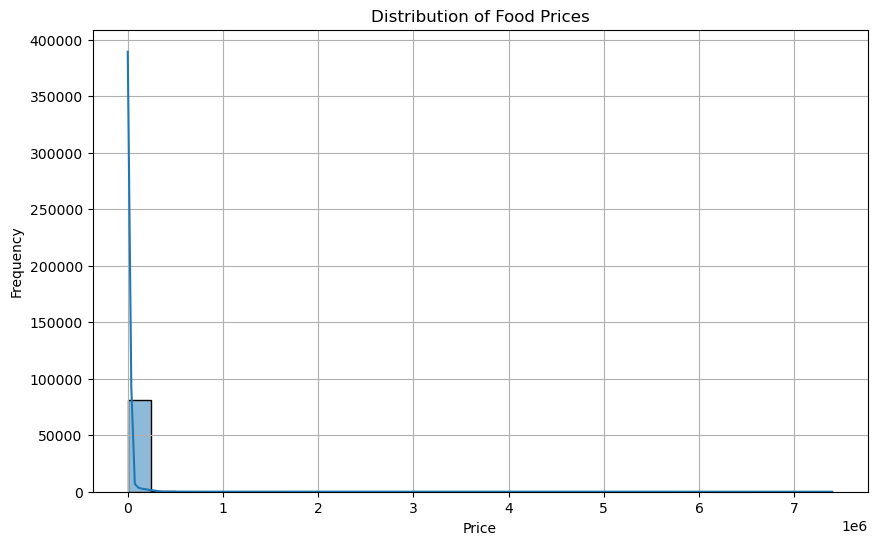

In [8]:
if 'price' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price'].dropna(), bins=30, kde=True)
    plt.title('Distribution of Food Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

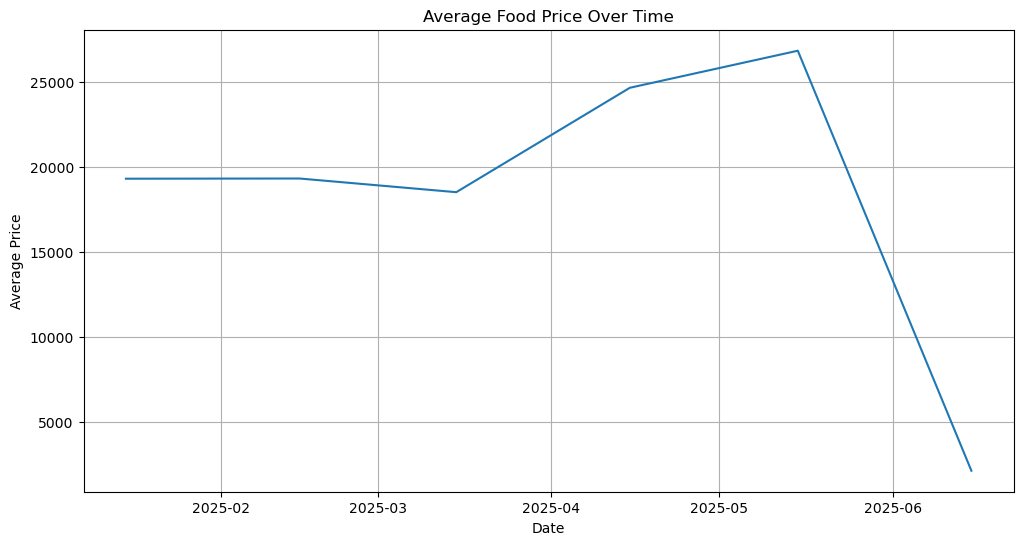

In [60]:
# Example 2: Time series plot of average prices (if 'date' and 'price' columns exist)
if 'date' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=price_over_time, x='date', y='price')
    plt.title('Average Food Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.grid(True)
    plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_32912\2945783371.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_commodities, x='commodity', y='price', palette='viridis')


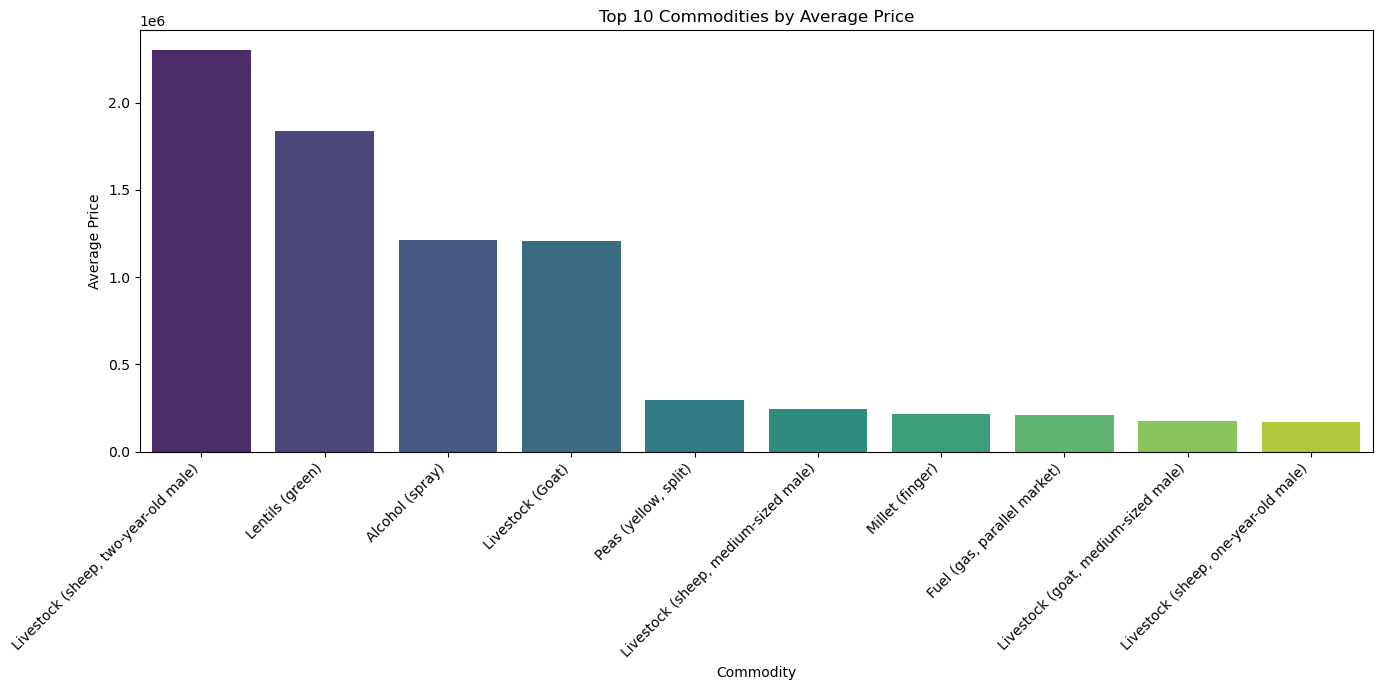

In [11]:
# Example 3: Bar plot of average prices by top 10 commodities
if 'commodity' in df.columns and 'price' in df.columns:
    # Calculate the average price by commodity first
    price_by_commodity = df.groupby('commodity')['price'].mean().reset_index().sort_values('price', ascending=False)
    
    # Now use the calculated data for plotting
    top_10_commodities = price_by_commodity.head(10)
    plt.figure(figsize=(14, 7))
    sns.barplot(data=top_10_commodities, x='commodity', y='price', palette='viridis')
    plt.title('Top 10 Commodities by Average Price')
    plt.xlabel('Commodity')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()